# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [9]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [10]:
train, test = keras.datasets.cifar10.load_data()

In [11]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [12]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train, flatten=False)
x_test = preproc_x(x_test, flatten=False)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [13]:
x_train.shape

(50000, 32, 32, 3)

In [14]:
def build_mlp(x_train):
    """
    Build your own model
    """
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    
    model.add(keras.layers.Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(units=512, activation='relu'))
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(units=256, activation='relu'))
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(units=10, activation='softmax'))
    return model

In [15]:
## 超參數設定
"""
Set your required experiment parameters
"""

LEARNING_RATE = [0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]
EPOCHS = 50
BATCH_SIZE = 256

In [16]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
results['SGD'] = {}

for lr in LEARNING_RATE:
    model = build_mlp(x_train)
    optimizer = keras.optimizers.SGD(lr=lr)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test, y_test), shuffle=True)
    
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']        
    train_acc = model.history.history['acc']
    valid_acc = model.history.history['val_acc']
    
    tag = 'lr-%s' % str(lr)
    results['SGD'][tag]={'train_loss':train_loss, 
                         'valid_loss': valid_loss, 
                         'train_acc': train_acc, 
                         'valid_acc': valid_acc}


results['RMSprop'] = {}

for lr in LEARNING_RATE:
    model = build_mlp(x_train)
    optimizer = keras.optimizers.RMSprop(lr=lr)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test, y_test), shuffle=True)
    
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']        
    train_acc = model.history.history['acc']
    valid_acc = model.history.history['val_acc']
    
    tag = 'lr-%s' % str(lr)
    results['RMSprop'][tag]={'train_loss':train_loss, 
                             'valid_loss': valid_loss, 
                             'train_acc': train_acc, 
                             'valid_acc': valid_acc}

results['AdaGrad'] = {}

for lr in LEARNING_RATE:
    model = build_mlp(x_train)
    optimizer = keras.optimizers.Adagrad(lr=lr)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test, y_test), shuffle=True)
    
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']        
    train_acc = model.history.history['acc']
    valid_acc = model.history.history['val_acc']
    
    tag = 'lr-%s' % str(lr)
    results['AdaGrad'][tag]={'train_loss':train_loss, 
                             'valid_loss': valid_loss, 
                             'train_acc': train_acc, 
                             'valid_acc': valid_acc}

results['Adam'] = {}

for lr in LEARNING_RATE:
    model = build_mlp(x_train)
    optimizer = keras.optimizers.Adam(lr=lr)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test, y_test), shuffle=True)
    
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']        
    train_acc = model.history.history['acc']
    valid_acc = model.history.history['val_acc']
    
    tag = 'lr-%s' % str(lr)
    results['Adam'][tag]={'train_loss':train_loss, 
                         'valid_loss': valid_loss, 
                         'train_acc': train_acc, 
                         'valid_acc': valid_acc}





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 76s 2ms/step - loss: 2.1287 - acc: 0.2238 - val_loss: 2.3241 - val_acc: 0.2145
Epoch 2/50
50000/50000 [==============================] - 72s 1ms/step - loss: 1.8564 - acc: 0.3389 - val_loss: 1.7669 - val_acc: 0.3524
Epoch 3/50
50000/50000 [==============================] - 72s 1ms/step - loss: 1.6556 - acc: 0.4098 - val_loss: 1.5397 - val_acc: 0.4442
Epoch 4/50
50000/50000 [==============================] - 80s 2ms/step - loss: 1.5353 - acc: 0.4518 - val_loss: 1.4449 - val_acc: 0.4757
Epoch 5/50
50000/50000 [==============================] - 82s 2ms/step - loss: 1.4503 - acc: 0.4799 - val_loss: 1.3530 - val_acc: 0.5223
Epoch 6/50
50000/50000 [===========================

50000/50000 [==============================] - 87s 2ms/step - loss: 0.1437 - acc: 0.9504 - val_loss: 1.3926 - val_acc: 0.6878
Epoch 49/50
50000/50000 [==============================] - 83s 2ms/step - loss: 0.1337 - acc: 0.9543 - val_loss: 1.2958 - val_acc: 0.7025
Epoch 50/50
50000/50000 [==============================] - 101s 2ms/step - loss: 0.1247 - acc: 0.9573 - val_loss: 1.2717 - val_acc: 0.7026
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 80s 2ms/step - loss: 2.2588 - acc: 0.1669 - val_loss: 2.1629 - val_acc: 0.2566
Epoch 2/50
50000/50000 [==============================] - 80s 2ms/step - loss: 2.0850 - acc: 0.2391 - val_loss: 1.9720 - val_acc: 0.3004
Epoch 3/50
50000/50000 [==============================] - 81s 2ms/step - loss: 1.9746 - acc: 0.2895 - val_loss: 1.9821 - val_acc: 0.2907
Epoch 4/50
50000/50000 [==============================] - 91s 2ms/step - loss: 1.9092 - acc: 0.3171 - val_loss: 1.8908 - val_acc: 0.3290

Epoch 7/50
50000/50000 [==============================] - 78s 2ms/step - loss: 1.9058 - acc: 0.3204 - val_loss: 1.8448 - val_acc: 0.3547
Epoch 8/50
50000/50000 [==============================] - 76s 2ms/step - loss: 1.8706 - acc: 0.3318 - val_loss: 1.8001 - val_acc: 0.3736
Epoch 9/50
50000/50000 [==============================] - 75s 2ms/step - loss: 1.8328 - acc: 0.3477 - val_loss: 1.7834 - val_acc: 0.3781
Epoch 10/50
50000/50000 [==============================] - 61s 1ms/step - loss: 1.7989 - acc: 0.3602 - val_loss: 1.7299 - val_acc: 0.3958
Epoch 11/50
50000/50000 [==============================] - 60s 1ms/step - loss: 1.7629 - acc: 0.3729 - val_loss: 1.7013 - val_acc: 0.3983
Epoch 12/50
50000/50000 [==============================] - 61s 1ms/step - loss: 1.7370 - acc: 0.3815 - val_loss: 1.6553 - val_acc: 0.4190
Epoch 13/50
50000/50000 [==============================] - 89s 2ms/step - loss: 1.7067 - acc: 0.3895 - val_loss: 1.6353 - val_acc: 0.4227
Epoch 14/50
50000/50000 [============

50000/50000 [==============================] - 62s 1ms/step - loss: 2.1191 - acc: 0.2331 - val_loss: 2.0803 - val_acc: 0.2784
Epoch 17/50
50000/50000 [==============================] - 60s 1ms/step - loss: 2.0980 - acc: 0.2382 - val_loss: 2.0574 - val_acc: 0.2855
Epoch 18/50
50000/50000 [==============================] - 61s 1ms/step - loss: 2.0805 - acc: 0.2430 - val_loss: 2.0381 - val_acc: 0.2899
Epoch 19/50
50000/50000 [==============================] - 65s 1ms/step - loss: 2.0644 - acc: 0.2485 - val_loss: 2.0219 - val_acc: 0.2921
Epoch 20/50
50000/50000 [==============================] - 74s 1ms/step - loss: 2.0500 - acc: 0.2547 - val_loss: 2.0085 - val_acc: 0.2945
Epoch 21/50
50000/50000 [==============================] - 75s 2ms/step - loss: 2.0382 - acc: 0.2585 - val_loss: 1.9959 - val_acc: 0.2992
Epoch 22/50
50000/50000 [==============================] - 71s 1ms/step - loss: 2.0276 - acc: 0.2638 - val_loss: 1.9854 - val_acc: 0.3049
Epoch 23/50
50000/50000 [=====================

50000/50000 [==============================] - 68s 1ms/step - loss: 2.1639 - acc: 0.2240 - val_loss: 2.1368 - val_acc: 0.2650
Epoch 26/50
50000/50000 [==============================] - 68s 1ms/step - loss: 2.1537 - acc: 0.2278 - val_loss: 2.1249 - val_acc: 0.2669
Epoch 27/50
50000/50000 [==============================] - 68s 1ms/step - loss: 2.1437 - acc: 0.2308 - val_loss: 2.1127 - val_acc: 0.2710
Epoch 28/50
50000/50000 [==============================] - 68s 1ms/step - loss: 2.1335 - acc: 0.2311 - val_loss: 2.1009 - val_acc: 0.2763
Epoch 29/50
50000/50000 [==============================] - 68s 1ms/step - loss: 2.1231 - acc: 0.2382 - val_loss: 2.0892 - val_acc: 0.2785
Epoch 30/50
50000/50000 [==============================] - 67s 1ms/step - loss: 2.1125 - acc: 0.2391 - val_loss: 2.0779 - val_acc: 0.2840
Epoch 31/50
50000/50000 [==============================] - 68s 1ms/step - loss: 2.1024 - acc: 0.2437 - val_loss: 2.0668 - val_acc: 0.2852
Epoch 32/50
50000/50000 [=====================

50000/50000 [==============================] - 60s 1ms/step - loss: 2.2736 - acc: 0.1488 - val_loss: 2.2638 - val_acc: 0.1612
Epoch 35/50
50000/50000 [==============================] - 59s 1ms/step - loss: 2.2728 - acc: 0.1494 - val_loss: 2.2629 - val_acc: 0.1627
Epoch 36/50
50000/50000 [==============================] - 59s 1ms/step - loss: 2.2713 - acc: 0.1513 - val_loss: 2.2619 - val_acc: 0.1656
Epoch 37/50
50000/50000 [==============================] - 59s 1ms/step - loss: 2.2704 - acc: 0.1535 - val_loss: 2.2610 - val_acc: 0.1670
Epoch 38/50
50000/50000 [==============================] - 59s 1ms/step - loss: 2.2693 - acc: 0.1538 - val_loss: 2.2600 - val_acc: 0.1693
Epoch 39/50
50000/50000 [==============================] - 59s 1ms/step - loss: 2.2689 - acc: 0.1526 - val_loss: 2.2590 - val_acc: 0.1712
Epoch 40/50
50000/50000 [==============================] - 60s 1ms/step - loss: 2.2688 - acc: 0.1526 - val_loss: 2.2579 - val_acc: 0.1739
Epoch 41/50
50000/50000 [=====================

50000/50000 [==============================] - 60s 1ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 43/50
50000/50000 [==============================] - 59s 1ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 44/50
50000/50000 [==============================] - 59s 1ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 45/50
50000/50000 [==============================] - 59s 1ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 46/50
50000/50000 [==============================] - 61s 1ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 47/50
50000/50000 [==============================] - 59s 1ms/step - loss: 14.5060 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 48/50
50000/50000 [==============================] - 59s 1ms/step - loss: 14.5066 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 49/50
50000/50000 [=======

50000/50000 [==============================] - 58s 1ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 60s 1ms/step - loss: 2.3663 - acc: 0.1819 - val_loss: 2.2858 - val_acc: 0.1880
Epoch 2/50
50000/50000 [==============================] - 59s 1ms/step - loss: 1.7607 - acc: 0.3695 - val_loss: 1.5008 - val_acc: 0.4580
Epoch 3/50
50000/50000 [==============================] - 59s 1ms/step - loss: 1.4829 - acc: 0.4768 - val_loss: 1.3685 - val_acc: 0.5023
Epoch 4/50
50000/50000 [==============================] - 59s 1ms/step - loss: 1.2767 - acc: 0.5544 - val_loss: 1.4124 - val_acc: 0.4994
Epoch 5/50
50000/50000 [==============================] - 59s 1ms/step - loss: 1.1425 - acc: 0.6046 - val_loss: 1.1968 - val_acc: 0.5912
Epoch 6/50
50000/50000 [==============================] - 59s 1ms/step - loss: 1.0268 - acc: 0.6451 - val_loss: 1.2288 - val_acc: 0.5814


Epoch 9/50
50000/50000 [==============================] - 61s 1ms/step - loss: 0.4738 - acc: 0.8352 - val_loss: 1.0346 - val_acc: 0.6824
Epoch 10/50
50000/50000 [==============================] - 60s 1ms/step - loss: 0.3960 - acc: 0.8617 - val_loss: 0.9190 - val_acc: 0.7183
Epoch 11/50
50000/50000 [==============================] - 60s 1ms/step - loss: 0.3276 - acc: 0.8846 - val_loss: 0.9749 - val_acc: 0.7164
Epoch 12/50
50000/50000 [==============================] - 59s 1ms/step - loss: 0.2630 - acc: 0.9079 - val_loss: 1.1989 - val_acc: 0.7004
Epoch 13/50
50000/50000 [==============================] - 60s 1ms/step - loss: 0.2213 - acc: 0.9227 - val_loss: 1.2645 - val_acc: 0.7032
Epoch 14/50
50000/50000 [==============================] - 59s 1ms/step - loss: 0.1828 - acc: 0.9360 - val_loss: 1.1983 - val_acc: 0.7215
Epoch 15/50
50000/50000 [==============================] - 60s 1ms/step - loss: 0.1585 - acc: 0.9462 - val_loss: 1.4052 - val_acc: 0.7009
Epoch 16/50
50000/50000 [==========

50000/50000 [==============================] - 60s 1ms/step - loss: 0.1921 - acc: 0.9354 - val_loss: 1.0657 - val_acc: 0.7185
Epoch 19/50
50000/50000 [==============================] - 60s 1ms/step - loss: 0.1610 - acc: 0.9452 - val_loss: 1.1088 - val_acc: 0.7318
Epoch 20/50
50000/50000 [==============================] - 60s 1ms/step - loss: 0.1387 - acc: 0.9528 - val_loss: 1.2666 - val_acc: 0.7130
Epoch 21/50
50000/50000 [==============================] - 60s 1ms/step - loss: 0.1237 - acc: 0.9584 - val_loss: 1.2704 - val_acc: 0.7179
Epoch 22/50
50000/50000 [==============================] - 60s 1ms/step - loss: 0.1066 - acc: 0.9641 - val_loss: 1.2903 - val_acc: 0.7171
Epoch 23/50
50000/50000 [==============================] - 60s 1ms/step - loss: 0.0954 - acc: 0.9680 - val_loss: 1.3296 - val_acc: 0.7256
Epoch 24/50
50000/50000 [==============================] - 60s 1ms/step - loss: 0.0863 - acc: 0.9711 - val_loss: 1.4224 - val_acc: 0.7174
Epoch 25/50
50000/50000 [=====================

50000/50000 [==============================] - 62s 1ms/step - loss: 0.7467 - acc: 0.7392 - val_loss: 0.8998 - val_acc: 0.6858
Epoch 28/50
50000/50000 [==============================] - 61s 1ms/step - loss: 0.7320 - acc: 0.7454 - val_loss: 0.9021 - val_acc: 0.6874
Epoch 29/50
50000/50000 [==============================] - 61s 1ms/step - loss: 0.7120 - acc: 0.7523 - val_loss: 0.8630 - val_acc: 0.7022
Epoch 30/50
50000/50000 [==============================] - 61s 1ms/step - loss: 0.6964 - acc: 0.7593 - val_loss: 0.8821 - val_acc: 0.6951
Epoch 31/50
50000/50000 [==============================] - 63s 1ms/step - loss: 0.6804 - acc: 0.7634 - val_loss: 0.8789 - val_acc: 0.7008
Epoch 32/50
50000/50000 [==============================] - 62s 1ms/step - loss: 0.6641 - acc: 0.7690 - val_loss: 0.8773 - val_acc: 0.6989
Epoch 33/50
50000/50000 [==============================] - 62s 1ms/step - loss: 0.6447 - acc: 0.7775 - val_loss: 0.8892 - val_acc: 0.6912
Epoch 34/50
50000/50000 [=====================

50000/50000 [==============================] - 59s 1ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 36/50
50000/50000 [==============================] - 59s 1ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 37/50
50000/50000 [==============================] - 59s 1ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 38/50
50000/50000 [==============================] - 60s 1ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 39/50
50000/50000 [==============================] - 60s 1ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 40/50
50000/50000 [==============================] - 65s 1ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 41/50
50000/50000 [==============================] - 74s 1ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 42/50
50000/50000 [=======

Epoch 44/50
50000/50000 [==============================] - 77s 2ms/step - loss: 0.0628 - acc: 0.9818 - val_loss: 1.2053 - val_acc: 0.7356
Epoch 45/50
50000/50000 [==============================] - 76s 2ms/step - loss: 0.0594 - acc: 0.9829 - val_loss: 1.1964 - val_acc: 0.7392
Epoch 46/50
50000/50000 [==============================] - 76s 2ms/step - loss: 0.0568 - acc: 0.9836 - val_loss: 1.1879 - val_acc: 0.7431
Epoch 47/50
50000/50000 [==============================] - 77s 2ms/step - loss: 0.0538 - acc: 0.9854 - val_loss: 1.2143 - val_acc: 0.7439
Epoch 48/50
50000/50000 [==============================] - 77s 2ms/step - loss: 0.0517 - acc: 0.9854 - val_loss: 1.2240 - val_acc: 0.7366
Epoch 49/50
50000/50000 [==============================] - 78s 2ms/step - loss: 0.0514 - acc: 0.9852 - val_loss: 1.2299 - val_acc: 0.7405
Epoch 50/50
50000/50000 [==============================] - 76s 2ms/step - loss: 0.0475 - acc: 0.9872 - val_loss: 1.2271 - val_acc: 0.7409
Train on 50000 samples, validate o

Epoch 3/50
50000/50000 [==============================] - 75s 2ms/step - loss: 1.4905 - acc: 0.4661 - val_loss: 1.4114 - val_acc: 0.4929
Epoch 4/50
50000/50000 [==============================] - 75s 2ms/step - loss: 1.4334 - acc: 0.4881 - val_loss: 1.3642 - val_acc: 0.5173
Epoch 5/50
50000/50000 [==============================] - 76s 2ms/step - loss: 1.3883 - acc: 0.5029 - val_loss: 1.3392 - val_acc: 0.5269
Epoch 6/50
50000/50000 [==============================] - 75s 2ms/step - loss: 1.3557 - acc: 0.5198 - val_loss: 1.3681 - val_acc: 0.5213
Epoch 7/50
50000/50000 [==============================] - 75s 2ms/step - loss: 1.3272 - acc: 0.5281 - val_loss: 1.2976 - val_acc: 0.5367
Epoch 8/50
50000/50000 [==============================] - 76s 2ms/step - loss: 1.3005 - acc: 0.5360 - val_loss: 1.2567 - val_acc: 0.5546
Epoch 9/50
50000/50000 [==============================] - 76s 2ms/step - loss: 1.2777 - acc: 0.5452 - val_loss: 1.2447 - val_acc: 0.5615
Epoch 10/50
50000/50000 [================

50000/50000 [==============================] - 61s 1ms/step - loss: 1.4355 - acc: 0.4870 - val_loss: 1.3880 - val_acc: 0.5064
Epoch 13/50
50000/50000 [==============================] - 61s 1ms/step - loss: 1.4201 - acc: 0.4955 - val_loss: 1.3705 - val_acc: 0.5169
Epoch 14/50
50000/50000 [==============================] - 61s 1ms/step - loss: 1.4091 - acc: 0.4946 - val_loss: 1.3599 - val_acc: 0.5206
Epoch 15/50
50000/50000 [==============================] - 62s 1ms/step - loss: 1.3987 - acc: 0.4987 - val_loss: 1.3511 - val_acc: 0.5230
Epoch 16/50
50000/50000 [==============================] - 61s 1ms/step - loss: 1.3872 - acc: 0.5040 - val_loss: 1.3429 - val_acc: 0.5254
Epoch 17/50
50000/50000 [==============================] - 61s 1ms/step - loss: 1.3770 - acc: 0.5077 - val_loss: 1.3334 - val_acc: 0.5290
Epoch 18/50
50000/50000 [==============================] - 62s 1ms/step - loss: 1.3686 - acc: 0.5140 - val_loss: 1.3299 - val_acc: 0.5316
Epoch 19/50
50000/50000 [=====================

50000/50000 [==============================] - 61s 1ms/step - loss: 1.7089 - acc: 0.3931 - val_loss: 1.6542 - val_acc: 0.4245
Epoch 22/50
50000/50000 [==============================] - 62s 1ms/step - loss: 1.7062 - acc: 0.3928 - val_loss: 1.6488 - val_acc: 0.4257
Epoch 23/50
50000/50000 [==============================] - 62s 1ms/step - loss: 1.6973 - acc: 0.3987 - val_loss: 1.6432 - val_acc: 0.4288
Epoch 24/50
50000/50000 [==============================] - 61s 1ms/step - loss: 1.6920 - acc: 0.3988 - val_loss: 1.6375 - val_acc: 0.4294
Epoch 25/50
50000/50000 [==============================] - 60s 1ms/step - loss: 1.6871 - acc: 0.3984 - val_loss: 1.6328 - val_acc: 0.4305
Epoch 26/50
50000/50000 [==============================] - 60s 1ms/step - loss: 1.6837 - acc: 0.4028 - val_loss: 1.6279 - val_acc: 0.4310
Epoch 27/50
50000/50000 [==============================] - 61s 1ms/step - loss: 1.6782 - acc: 0.4034 - val_loss: 1.6236 - val_acc: 0.4333
Epoch 28/50
50000/50000 [=====================

Epoch 30/50
50000/50000 [==============================] - 61s 1ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 31/50
50000/50000 [==============================] - 62s 1ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 32/50
50000/50000 [==============================] - 61s 1ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 33/50
50000/50000 [==============================] - 62s 1ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 34/50
50000/50000 [==============================] - 61s 1ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 35/50
50000/50000 [==============================] - 61s 1ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 36/50
50000/50000 [==============================] - 62s 1ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 37/50
50000/50

Epoch 39/50
50000/50000 [==============================] - 61s 1ms/step - loss: 1.4066 - acc: 0.4938 - val_loss: 1.4444 - val_acc: 0.4780
Epoch 40/50
50000/50000 [==============================] - 61s 1ms/step - loss: 1.3972 - acc: 0.4958 - val_loss: 1.4247 - val_acc: 0.4933
Epoch 41/50
50000/50000 [==============================] - 61s 1ms/step - loss: 1.4038 - acc: 0.4946 - val_loss: 1.4729 - val_acc: 0.4711
Epoch 42/50
50000/50000 [==============================] - 62s 1ms/step - loss: 1.3853 - acc: 0.5000 - val_loss: 1.4374 - val_acc: 0.4770
Epoch 43/50
50000/50000 [==============================] - 60s 1ms/step - loss: 1.3964 - acc: 0.4958 - val_loss: 1.4497 - val_acc: 0.4785
Epoch 44/50
50000/50000 [==============================] - 60s 1ms/step - loss: 1.3875 - acc: 0.5001 - val_loss: 1.4356 - val_acc: 0.4865
Epoch 45/50
50000/50000 [==============================] - 62s 1ms/step - loss: 1.3882 - acc: 0.4992 - val_loss: 1.4385 - val_acc: 0.4875
Epoch 46/50
50000/50000 [=========

50000/50000 [==============================] - 61s 1ms/step - loss: 0.2824 - acc: 0.9074 - val_loss: 1.6084 - val_acc: 0.6518
Epoch 49/50
50000/50000 [==============================] - 65s 1ms/step - loss: 0.2718 - acc: 0.9107 - val_loss: 1.5915 - val_acc: 0.6519
Epoch 50/50
50000/50000 [==============================] - 61s 1ms/step - loss: 0.2714 - acc: 0.9110 - val_loss: 1.6880 - val_acc: 0.6424
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 67s 1ms/step - loss: 1.5927 - acc: 0.4164 - val_loss: 1.2447 - val_acc: 0.5563
Epoch 2/50
50000/50000 [==============================] - 62s 1ms/step - loss: 1.1661 - acc: 0.5871 - val_loss: 1.0542 - val_acc: 0.6319
Epoch 3/50
50000/50000 [==============================] - 62s 1ms/step - loss: 0.9923 - acc: 0.6517 - val_loss: 0.9328 - val_acc: 0.6733
Epoch 4/50
50000/50000 [==============================] - 62s 1ms/step - loss: 0.8711 - acc: 0.6933 - val_loss: 0.8794 - val_acc: 0.6954


Epoch 7/50
50000/50000 [==============================] - 63s 1ms/step - loss: 0.8261 - acc: 0.7109 - val_loss: 0.8799 - val_acc: 0.6936
Epoch 8/50
50000/50000 [==============================] - 63s 1ms/step - loss: 0.7609 - acc: 0.7339 - val_loss: 0.8577 - val_acc: 0.7034
Epoch 9/50
50000/50000 [==============================] - 62s 1ms/step - loss: 0.7044 - acc: 0.7539 - val_loss: 0.8799 - val_acc: 0.6963
Epoch 10/50
50000/50000 [==============================] - 62s 1ms/step - loss: 0.6571 - acc: 0.7705 - val_loss: 0.8350 - val_acc: 0.7087
Epoch 11/50
50000/50000 [==============================] - 64s 1ms/step - loss: 0.6079 - acc: 0.7885 - val_loss: 0.8048 - val_acc: 0.7254
Epoch 12/50
50000/50000 [==============================] - 63s 1ms/step - loss: 0.5565 - acc: 0.8063 - val_loss: 0.8053 - val_acc: 0.7245
Epoch 13/50
50000/50000 [==============================] - 62s 1ms/step - loss: 0.5060 - acc: 0.8255 - val_loss: 0.8258 - val_acc: 0.7263
Epoch 14/50
50000/50000 [============

50000/50000 [==============================] - 64s 1ms/step - loss: 0.8783 - acc: 0.6952 - val_loss: 0.9688 - val_acc: 0.6574
Epoch 17/50
50000/50000 [==============================] - 62s 1ms/step - loss: 0.8632 - acc: 0.6985 - val_loss: 0.9384 - val_acc: 0.6723
Epoch 18/50
50000/50000 [==============================] - 63s 1ms/step - loss: 0.8391 - acc: 0.7078 - val_loss: 0.9304 - val_acc: 0.6706
Epoch 19/50
50000/50000 [==============================] - 63s 1ms/step - loss: 0.8204 - acc: 0.7146 - val_loss: 0.8962 - val_acc: 0.6894
Epoch 20/50
50000/50000 [==============================] - 63s 1ms/step - loss: 0.7970 - acc: 0.7235 - val_loss: 0.8843 - val_acc: 0.6923
Epoch 21/50
50000/50000 [==============================] - 62s 1ms/step - loss: 0.7790 - acc: 0.7295 - val_loss: 0.8792 - val_acc: 0.6914
Epoch 22/50
50000/50000 [==============================] - 63s 1ms/step - loss: 0.7609 - acc: 0.7353 - val_loss: 0.8793 - val_acc: 0.6939
Epoch 23/50
50000/50000 [=====================

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


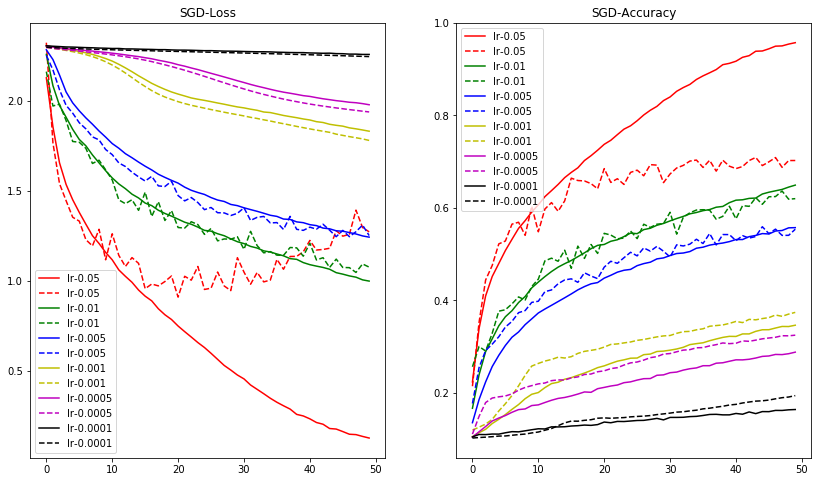

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ["r", "g", "b", "y", "m", "k"]
"""
將實驗結果繪出
"""
plt.figure(figsize=(14,8))
for i, tag in enumerate(results['SGD'].keys()):
    plt.subplot(121)
    plt.plot(range(len(results['SGD'][tag]['train_loss'])), results['SGD'][tag]['train_loss'], '-', 
             label=tag, color=color_bar[i])
    plt.plot(range(len(results['SGD'][tag]['valid_loss'])), results['SGD'][tag]['valid_loss'], '--', 
             label=tag, color=color_bar[i])
    plt.title('SGD-Loss')
    plt.legend()
    
    plt.subplot(122)
    plt.plot(range(len(results['SGD'][tag]['train_acc'])), results['SGD'][tag]['train_acc'], '-', 
             label=tag, color=color_bar[i])
    plt.plot(range(len(results['SGD'][tag]['valid_acc'])), results['SGD'][tag]['valid_acc'], '--', 
             label=tag, color=color_bar[i])
    plt.title('SGD-Accuracy')
    plt.legend()
plt.show()

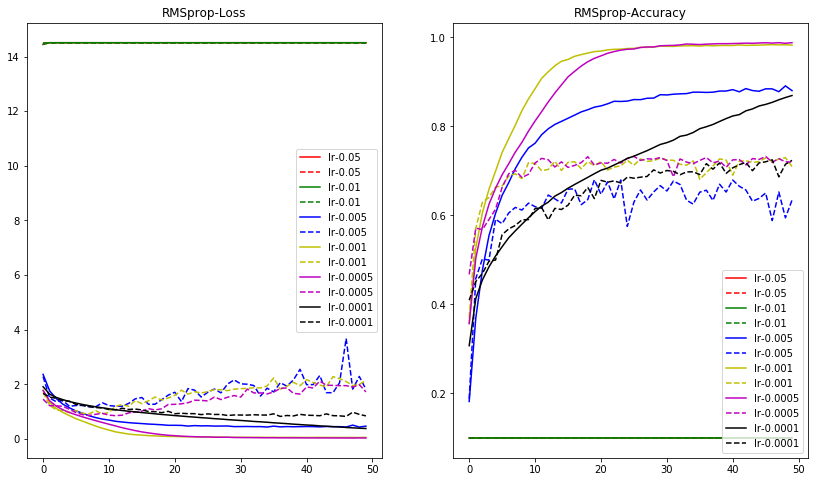

In [18]:
plt.figure(figsize=(14,8))
for i, tag in enumerate(results['RMSprop'].keys()):
    plt.subplot(121)
    plt.plot(range(len(results['RMSprop'][tag]['train_loss'])), results['RMSprop'][tag]['train_loss'], '-', 
             label=tag, color=color_bar[i])
    plt.plot(range(len(results['RMSprop'][tag]['valid_loss'])), results['RMSprop'][tag]['valid_loss'], '--', 
             label=tag, color=color_bar[i])
    plt.title('RMSprop-Loss')
    plt.legend()
    
    plt.subplot(122)
    plt.plot(range(len(results['RMSprop'][tag]['train_acc'])), results['RMSprop'][tag]['train_acc'], '-', 
             label=tag, color=color_bar[i])
    plt.plot(range(len(results['RMSprop'][tag]['valid_acc'])), results['RMSprop'][tag]['valid_acc'], '--', 
             label=tag, color=color_bar[i])
    plt.title('RMSprop-Accuracy')
    plt.legend()
plt.show()

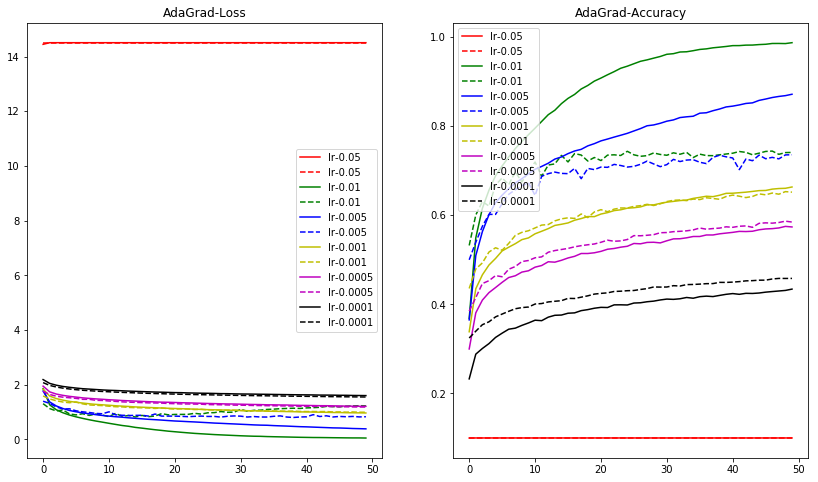

In [19]:
plt.figure(figsize=(14,8))
for i, tag in enumerate(results['AdaGrad'].keys()):
    plt.subplot(121)
    plt.plot(range(len(results['AdaGrad'][tag]['train_loss'])), results['AdaGrad'][tag]['train_loss'], '-', 
             label=tag, color=color_bar[i])
    plt.plot(range(len(results['AdaGrad'][tag]['valid_loss'])), results['AdaGrad'][tag]['valid_loss'], '--', 
             label=tag, color=color_bar[i])
    plt.title('AdaGrad-Loss')
    plt.legend()
    
    plt.subplot(122)
    plt.plot(range(len(results['AdaGrad'][tag]['train_acc'])), results['AdaGrad'][tag]['train_acc'], '-', 
             label=tag, color=color_bar[i])
    plt.plot(range(len(results['AdaGrad'][tag]['valid_acc'])), results['AdaGrad'][tag]['valid_acc'], '--', 
             label=tag, color=color_bar[i])
    plt.title('AdaGrad-Accuracy')
    plt.legend()
plt.show()

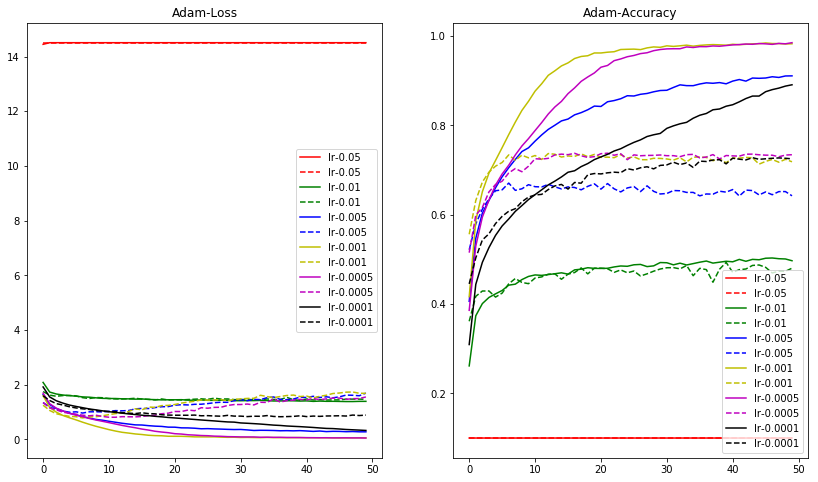

In [20]:
plt.figure(figsize=(14,8))
for i, tag in enumerate(results['Adam'].keys()):
    plt.subplot(121)
    plt.plot(range(len(results['Adam'][tag]['train_loss'])), results['Adam'][tag]['train_loss'], '-', 
             label=tag, color=color_bar[i])
    plt.plot(range(len(results['Adam'][tag]['valid_loss'])), results['Adam'][tag]['valid_loss'], '--', 
             label=tag, color=color_bar[i])
    plt.title('Adam-Loss')
    plt.legend()
    
    plt.subplot(122)
    plt.plot(range(len(results['Adam'][tag]['train_acc'])), results['Adam'][tag]['train_acc'], '-', 
             label=tag, color=color_bar[i])
    plt.plot(range(len(results['Adam'][tag]['valid_acc'])), results['Adam'][tag]['valid_acc'], '--', 
             label=tag, color=color_bar[i])
    plt.title('Adam-Accuracy')
    plt.legend()
plt.show()